In [2]:
%matplotlib ipympl

from onix.data_tools import get_experiment_data
from onix.data_tools import get_last_expts_data_number
from functools import partial
from onix.analysis.fitter import Fitter
from onix.analysis.helper import data_groups
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt

In [3]:
def p_excited(t, Omega, delta, tau):
    Omega_gen = np.sqrt(Omega**2 + delta**2)
    offset = Omega ** 2 / Omega_gen ** 2 / 2
    return offset + (Omega ** 2 / Omega_gen ** 2 * np.sin(Omega_gen * t / 2) ** 2 - offset) * np.exp(-t / tau)

In [4]:
def gaussian(f, f_0, a, sigma, c, b):
    numerator = (f - f_0) ** 2
    denominator = 2 * sigma ** 2
    return a * np.exp(-numerator / denominator) + c + b * (f - f_0)

def linear(x, a, b):
    return a*x + b

def get_gaussian_fit(detunings, voltages):    
    fitter = Fitter(gaussian)
    fitter.set_absolute_sigma(False)
    fitter.set_p0({"a": -1})
    fitter.set_data(detunings, voltages)
    fitter.fit()
    
    return fitter

def get_linear_fit(amplitudes, heights):
    fitter = Fitter(linear)
    fitter.set_absolute_sigma(False)
    fitter.set_data(amplitudes, heights)
    fitter.fit()

    return fitter

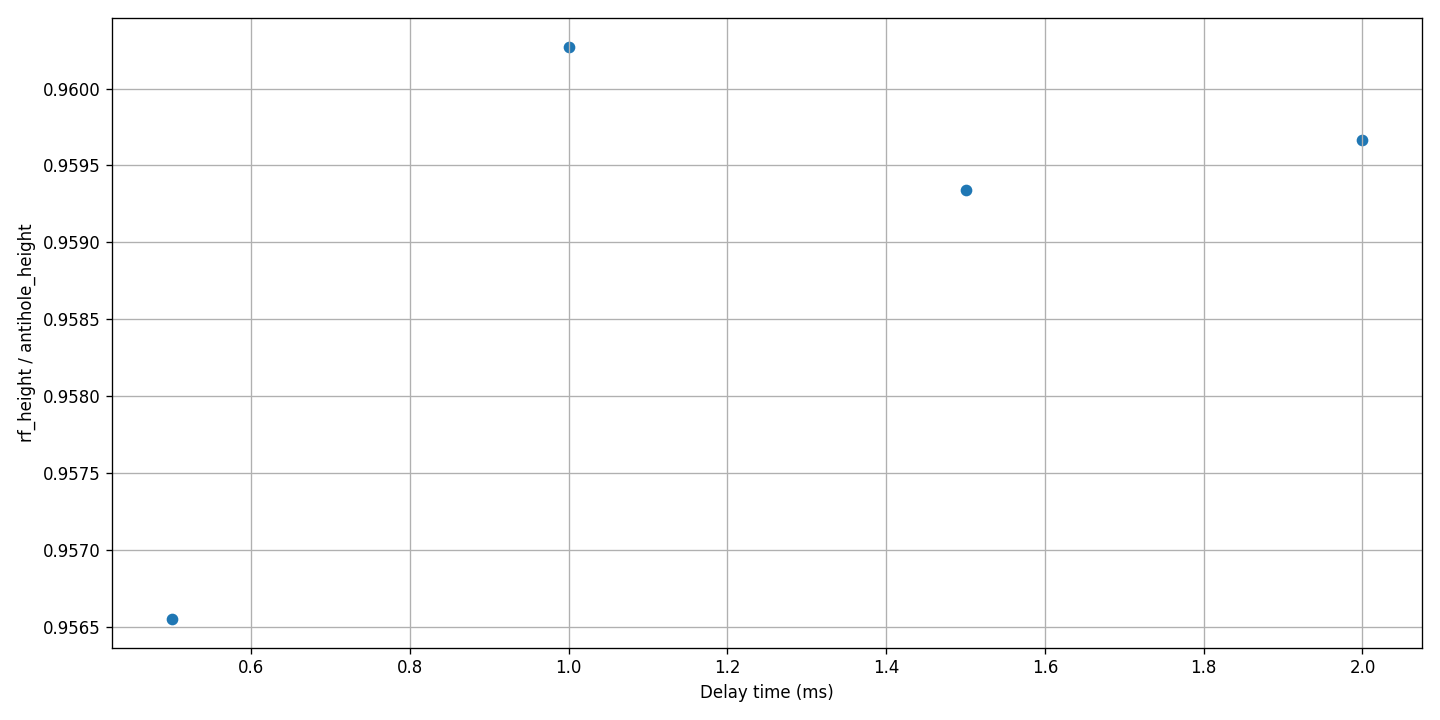

4


In [63]:
use_chasm = True

antihole_heights = []
antihole_height_errs = []
rf_heights = []
rf_height_errs = []
delay_times = []
rf_phases = []
rf_frequencies = []
dnum = get_last_expts_data_number()
#for kk in range(13780, 13811):
#for kk in range(13821, 13868):
#for kk in range(13860, 13868):
#for kk in list(range(14003, 14031)):
for kk in list(range(14032, 14611)):
    data, headers = get_experiment_data(kk)
    detunings_MHz = headers["detunings"].to("MHz").magnitude
    delay_times.append(headers["params"]["rf"]["delay_time"].to("ms").magnitude)
    try:
        rf_phases.append(headers["params"]["rf"]["phase"])
    except Exception:
        pass
    rf_frequencies.append(headers["params"]["rf"]["offset_1"].to("kHz").magnitude)
    (chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
    if use_chasm:
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_avg/chasm_avg)
        rf_fit = get_gaussian_fit(detunings_MHz, rf_avg/chasm_avg)
    else:
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_avg/monitor_antihole_avg)
        rf_fit = get_gaussian_fit(detunings_MHz, rf_avg/monitor_rf_avg)
    antihole_heights.append(antihole_fit.results["a"])
    antihole_height_errs.append(antihole_fit.errors["a"])
    rf_heights.append(rf_fit.results["a"])
    rf_height_errs.append(rf_fit.errors["a"])

antihole_heights = np.array(antihole_heights)
antihole_height_errs = np.array(antihole_height_errs)
rf_heights = np.array(rf_heights)
rf_height_errs = np.array(rf_height_errs)
delay_times = np.array(delay_times)
rf_phases = np.array(rf_phases)
rf_frequencies = np.array(rf_frequencies)

ratios = rf_heights / antihole_heights
ratio_errs = ratios * np.sqrt(
    (rf_height_errs / rf_heights) ** 2
    + (antihole_height_errs / antihole_heights) ** 2
)
    


fig, ax = plt.subplots(figsize=(12, 6), dpi = 120)

ax.scatter(delay_times, ratios)
# colors = np.linspace(0, 1, len(ratios))

# for kk in rf_frequencies_no_dup[0:41]:
#     mask = rf_frequencies == kk
#     ax.scatter(rf_frequencies[mask], 1/ratios[mask], label=f"{kk} kHz")
# ca = ax.scatter(delay_times, 1 - ratios, c = colors, cmap = "jet", zorder = 2)
#ax.legend()
# cbar = plt.colorbar(ca)
# cbar.ax.text(5, 1, "Latest data", ha='center', va='center')
# cbar.ax.text(5, 0, "Oldest data", ha='center', va='center')
# ax.set_xlabel("CQB delay time (ms)")
# ax.set_xlabel("Phase difference")
ax.set_xlabel("Delay time (ms)")
ax.set_ylabel("rf_height / antihole_height")
plt.grid()
plt.tight_layout()
plt.show()
print(len(ratios))

In [70]:
use_chasm = True

antihole_heights = []
antihole_height_errs = []
rf_heights = []
rf_height_errs = []
delay_times = []
rf_phases = []
rf_frequencies = []
# for kk in range(3990, 4090):  # 1 to 2 ms scan
# for kk in range(4255, 4275):  # 0.5 to 0.51 ms scan
# for kk in range(4376, 4499):
# for kk in range(4499, 4546):
dnum = get_last_expts_data_number()
# for kk in range(4628, 4644): # -40 to -32
# for kk in range(4628, 4660):
# for kk in range(4666, 4691): # sweep pulse 10khz/0.3ms
# for kk in range(4691, 4710):
# for kk in range(4710, 4735):
# for kk in range(4766, dnum + 1): # overnight cqb data
for kk in range(14032, 14612):
    data, headers = get_experiment_data(kk)
    detunings_MHz = headers["detunings"].to("MHz").magnitude
    delay_times.append(headers["params"]["rf"]["delay_time"].to("ms").magnitude)
    try:
        rf_phases.append(headers["params"]["rf"]["phase"])
    except Exception:
        pass
    rf_frequencies.append(headers["params"]["rf"]["offset_1"].to("kHz").magnitude)
    (chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
    if use_chasm:
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_avg/chasm_avg)
        rf_fit = get_gaussian_fit(detunings_MHz, rf_avg/chasm_avg)
    else:
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_avg/monitor_antihole_avg)
        rf_fit = get_gaussian_fit(detunings_MHz, rf_avg/monitor_rf_avg)
    antihole_heights.append(antihole_fit.results["a"])
    antihole_height_errs.append(antihole_fit.errors["a"])
    rf_heights.append(rf_fit.results["a"])
    rf_height_errs.append(rf_fit.errors["a"])



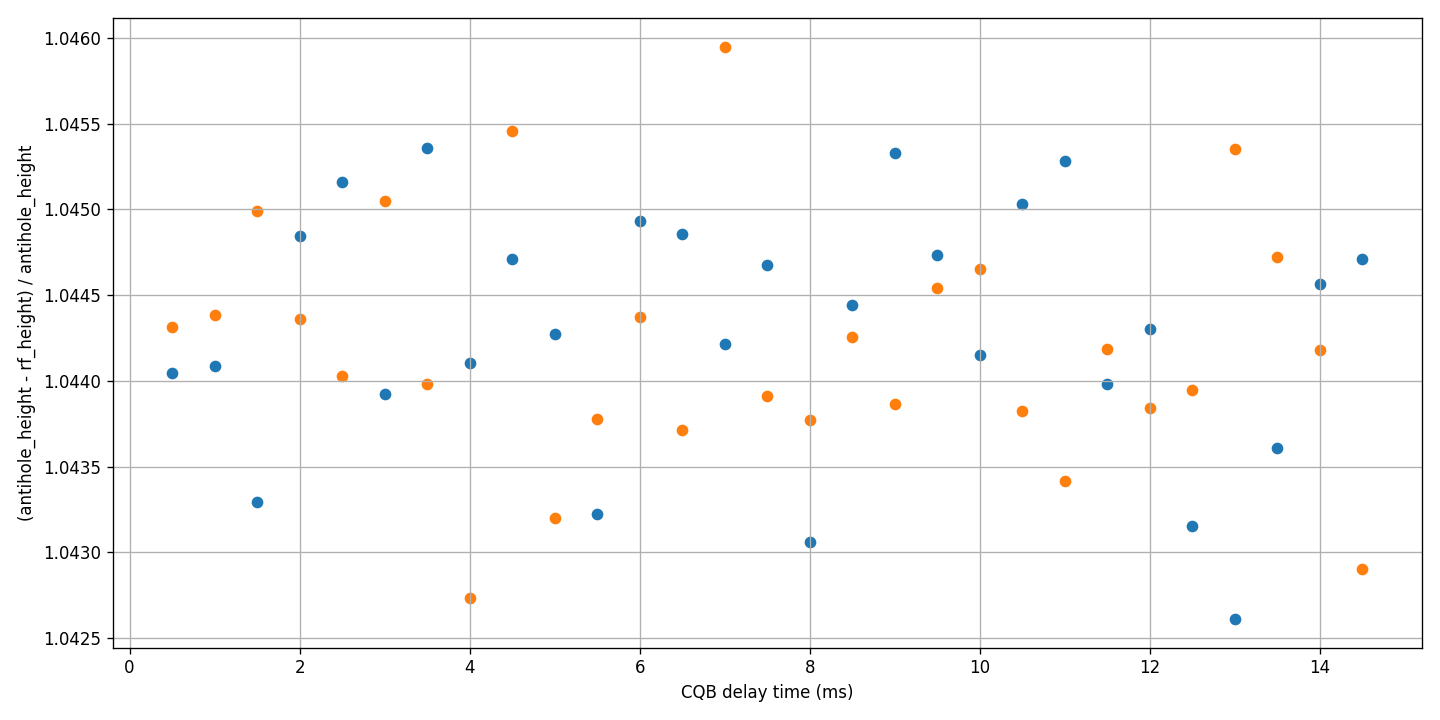

580


In [83]:
antihole_heights = np.array(antihole_heights)
antihole_height_errs = np.array(antihole_height_errs)
rf_heights = np.array(rf_heights)
rf_height_errs = np.array(rf_height_errs)
delay_times = np.array(delay_times)
rf_phases = np.array(rf_phases)
rf_frequencies = np.array(rf_frequencies)
rf_frequencies_no_dup = sorted(list(set(rf_frequencies)))

fig, ax = plt.subplots(figsize=(12, 6), dpi = 120)

ratios = rf_heights / antihole_heights
ratio_errs = ratios * np.sqrt(
    (rf_height_errs / rf_heights) ** 2
    + (antihole_height_errs / antihole_heights) ** 2
)
colors = np.linspace(0, 1, len(ratios))

for kk in rf_frequencies_no_dup[18:21]:
    mask = rf_frequencies == kk
    ax.scatter(delay_times[mask], 1/ratios[mask], label=f"{kk} kHz")
# ca = ax.scatter(delay_times, 1 - ratios, c = colors, cmap = "jet", zorder = 2)
#ax.legend()
# cbar = plt.colorbar(ca)
# cbar.ax.text(5, 1, "Latest data", ha='center', va='center')
# cbar.ax.text(5, 0, "Oldest data", ha='center', va='center')
ax.set_xlabel("CQB delay time (ms)")
# ax.set_xlabel("Phase difference")
# ax.set_xlabel("RF frequency - 119.2 MHz (kHz)")
ax.set_ylabel("(antihole_height - rf_height) / antihole_height")
plt.grid()
plt.tight_layout()
plt.show()
print(len(ratios))

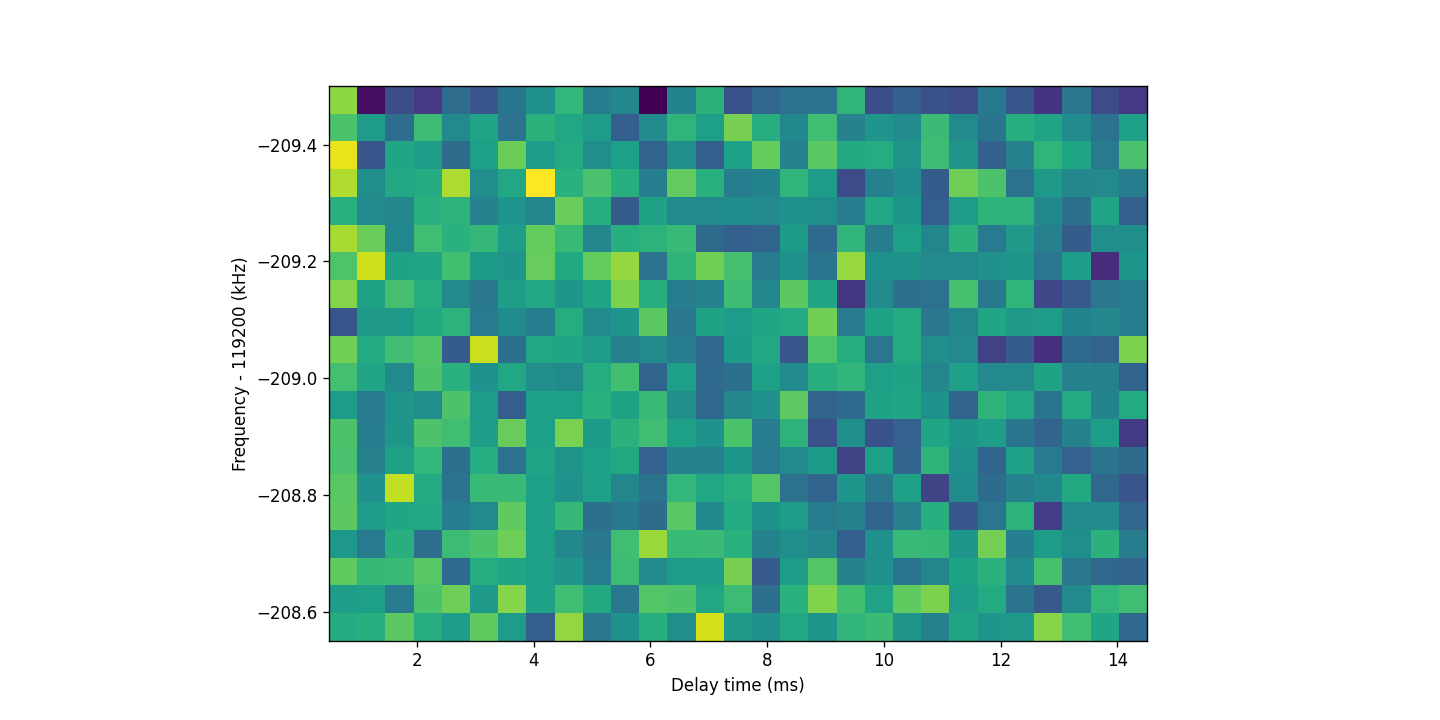

In [93]:

fig, ax = plt.subplots(figsize=(12, 6), dpi = 120)
ax.imshow(np.reshape(1/ratios, (20, 29)), extent=[min(delay_times), max(delay_times), max(rf_frequencies), min(rf_frequencies)])
ax.set_xlabel("Delay time (ms)")
ax.set_ylabel("Frequency - 119200 (kHz)")
ax.set_aspect(10)
plt.show()

In [84]:
data, headers = get_experiment_data(14032)
(chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
detunings_MHz = headers["detunings"].to("MHz").magnitude

In [85]:
headers

{'params': {'wm_channel': 5,
  'repeats': 20,
  'ao': {'name': 'ao_dp',
   'order': 2,
   'frequency': 74 <Unit('megahertz')>,
   'amplitude': 2000,
   'detect_amplitude': 650,
   'rise_delay': 1.1 <Unit('microsecond')>,
   'fall_delay': 0.6 <Unit('microsecond')>},
  'eos': {'ac': {'name': 'eo_ac',
    'amplitude': 4500,
    'offset': -300 <Unit('megahertz')>},
   'bb': {'name': 'eo_bb',
    'amplitude': 1900,
    'offset': -300 <Unit('megahertz')>},
   'ca': {'name': 'eo_ca',
    'amplitude': 1400,
    'offset': -300 <Unit('megahertz')>}},
  'field_plate': {'name': 'field_plate',
   'use': False,
   'amplitude': 0,
   'stark_shift': 1 <Unit('megahertz')>,
   'padding_time': 1 <Unit('millisecond')>},
  'chasm': {'transition': 'bb',
   'scan': 2.8 <Unit('megahertz')>,
   'scan_rate': 3.0 <Unit('megahertz / second')>,
   'detuning': 0 <Unit('megahertz')>},
  'antihole': {'transitions': ['ac', 'ca'],
   'scan': 0 <Unit('megahertz')>,
   'scan_rate': 0.0 <Unit('megahertz / second')>,
   'd

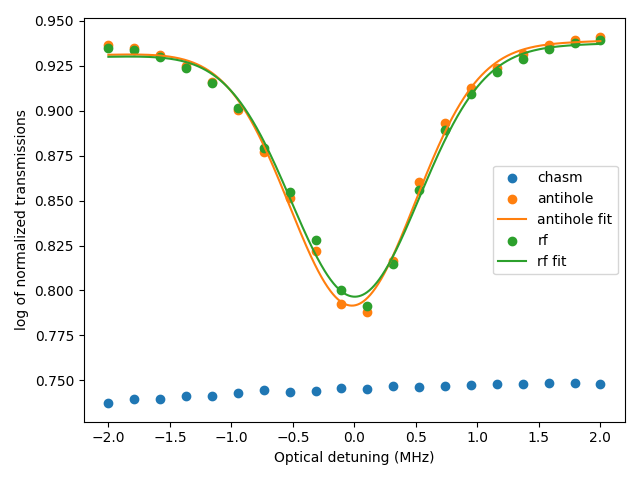

f_0 = -0.017(13)
a = -0.143(3)
sigma = 0.510(15)
c = 0.9349(19)
b = 0.0019(10)
Reduced chi-square is undefined.
f_0 = 0.007(13)
a = -0.137(3)
sigma = 0.520(15)
c = 0.9336(18)
b = 0.0018(9)
Reduced chi-square is undefined.


In [86]:
antihole_normalized = antihole_avg/chasm_avg
rf_normalized = rf_avg/chasm_avg
rf_normalized_by_antihole = rf_normalized / antihole_normalized

fig, ax = plt.subplots()
ax.scatter(detunings_MHz, chasm_avg, label="chasm", color="C0")

xaxis = np.linspace(min(detunings_MHz), max(detunings_MHz), 1000)
antihole_fit = get_gaussian_fit(detunings_MHz, antihole_normalized)
ax.scatter(detunings_MHz, antihole_normalized, label="antihole", color="C1")
ax.plot(xaxis, antihole_fit.fitted_value(xaxis), label = "antihole fit", color="C1")

if "rf_repeats" in headers["params"]["detect"]:
    #ax.scatter(detunings_MHz, rf_normalized, label="rf", color="C2")
    #ax.scatter(detunings_MHz, rf_normalized_by_antihole, label="rf", color="C1")
    #ax.scatter(detunings_MHz, np.average(rf_avg, axis=0) / np.average(antihole_avg, axis=0), label="rf / antihole")

    # rf_fit = get_double_gaussian_fit(detunings_MHz, rf_normalized_by_antihole)]
    rf_fit = get_gaussian_fit(detunings_MHz, rf_normalized)
    #rf_fit = get_quadratic_fit(detunings_MHz, log_rf_normalized)
    ax.scatter(detunings_MHz, rf_normalized, label="rf", color="C2")
    ax.plot(xaxis, rf_fit.fitted_value(xaxis), label = 'rf fit', color="C2")
            
ax.set_xlabel("Optical detuning (MHz)")
ax.set_ylabel("log of normalized transmissions")
plt.legend()
plt.tight_layout()
plt.show()

print(antihole_fit.all_results_str())
print(rf_fit.all_results_str())

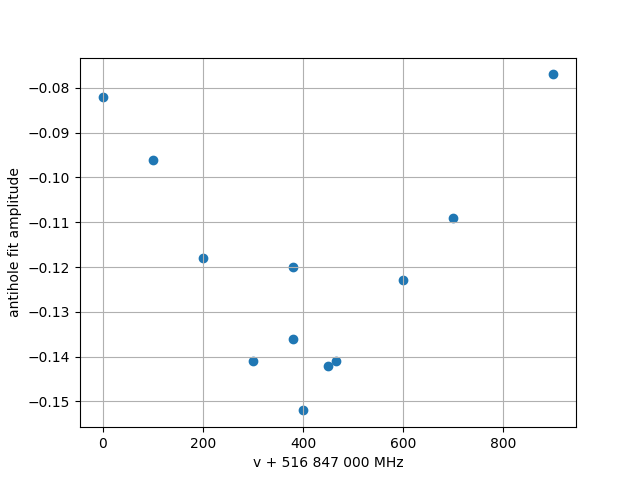

In [178]:
# fig, ax = plt.subplots()
# # ax.scatter(detunings_MHz, rf_avg, label="chasm", color="C0")
# # ax.scatter(detunings_MHz, antihole_avg, label="antihole", color="C1")
# ax.scatter(detunings_MHz, rf_avg/chasm_avg)
# plt.show()


# a     sigma freq num
#-0.120 0.331 380 3778
#-0.154 0.349 450 3779 - while scanning
#-0.144 0.356 500 3780 - while scanning
#-0.138 0.376 465 3781 - while scanning
#-0.141 0.354 465 3782
#-0.142 0.385 450 3783
#-0.123 0.334 600 3784
#-0.109 0.332 700 3785
#-0.077 0.367 900 3786
#-0.141 0.396 300 3787
#-0.118 0.388 200 3788


freqs = [380, 465, 450, 600, 700, 900, 300, 200, 100, 0, 400, 380]
aas = [-0.120, -0.141, -0.142, -0.123, -0.109, -0.077, -0.141, -0.118, -0.096, -0.082, -0.152, -0.136]


fig, ax = plt.subplots()
ax.scatter(freqs, aas)
ax.set_ylabel("antihole fit amplitude")
ax.set_xlabel("v + 516 847 000 MHz")
plt.grid()
plt.show()

In [769]:
def excited_state_population(Omega, t, delta):
    W = np.sqrt(Omega**2 + delta**2)
    return Omega**2 / W**2 * np.sin(W * t / 2) ** 2

In [805]:
def excited_state_population_inhom(Omega, t, delta_max, steps):
    total = np.zeros(len(t))
    for delta in np.linspace(-delta_max, delta_max, steps):
        total += excited_state_population(Omega, t, delta)
    return total / steps

TypeError: object of type 'float' has no len()

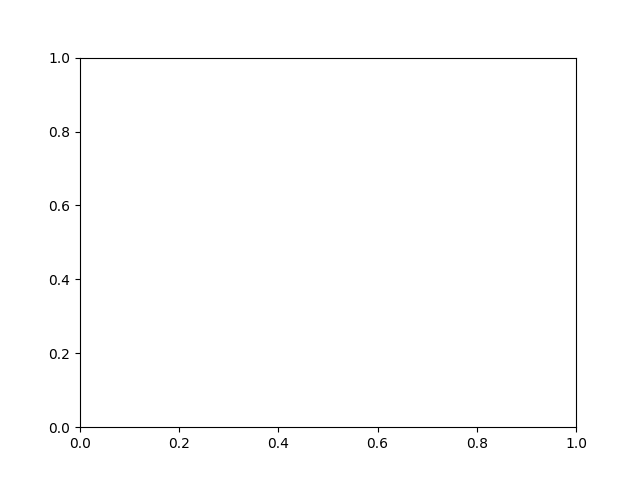

In [812]:
fig, ax = plt.subplots()
t = 0.2e-3
Omegas = np.linspace(0, 0.5e5, 300)
ax.plot(Omegas, excited_state_population_inhom(Omegas, 2*t, 100000, 100000))
ax.plot(Omegas, excited_state_population_inhom(Omegas, t, 100000, 100000))
ax.plot(Omegas, excited_state_population_inhom(Omegas, t / 2, 100000, 100000))
ax.plot(Omegas, excited_state_population_inhom(Omegas, t / 4, 100000, 100000))
ax.plot(Omegas, excited_state_population_inhom(Omegas, t / 8, 100000, 100000))
ax.plot(Omegas, excited_state_population_inhom(Omegas, t / 16, 100000, 100000))
plt.show()

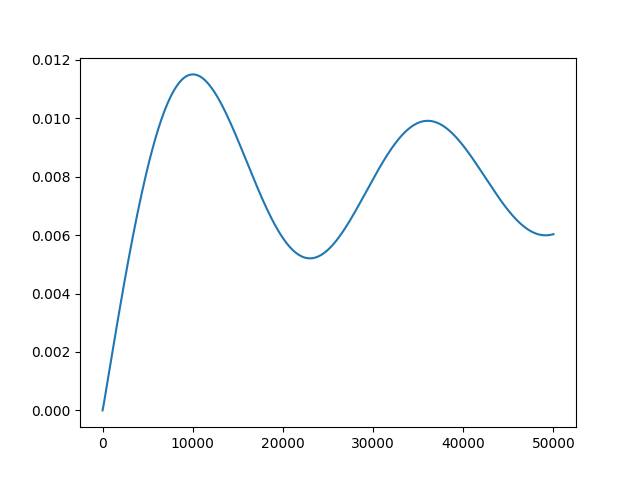

In [810]:
fig, ax = plt.subplots()
Omega = 1e3
ts = np.linspace(0, 12e-3, 300)
ax.plot(Omegas, excited_state_population_inhom(Omega, ts, 100000, 100000))
plt.show()